In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',40)
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from read_functions import *
from pickle_functions import *

In [4]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'

contries_path = '../datas/countries/countries.csv'


In [5]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle'
rate_beer_path = '../datas/RateBeer/pickle'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'

In [6]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users']

### Import datas stored as pickle

In [7]:
df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


### First analysis

In [8]:
df_matched_beer_users.head(2)

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel


In [9]:
cols=list(df_matched_beer_users.iloc[0].values)
suffixes=list(df_matched_beer_users.columns)
new_columns=[cols[i]+"_"+suffixes[i][:2] for i in range(len(suffixes))]

In [10]:
df_matched_beer_users.columns=new_columns

In [11]:
df_matched_beer_users.drop(0,axis=0,inplace=True)

In [12]:
df_matched_beer_users.head(3)

,joined_ba,location_ba,nbr_ratings_ba,nbr_reviews_ba,user_id_ba,user_name_ba,user_name_lower_ba,joined_rb,location_rb,nbr_ratings_rb,user_id_rb,user_name_rb,user_name_lower_rb
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop


In [13]:
df_matched_beer_users.dtypes

joined_ba             object
location_ba           object
nbr_ratings_ba        object
nbr_reviews_ba        object
user_id_ba            object
user_name_ba          object
user_name_lower_ba    object
joined_rb             object
location_rb           object
nbr_ratings_rb        object
user_id_rb            object
user_name_rb          object
user_name_lower_rb    object
dtype: object

In [15]:
for col in ["joined_ba","joined_rb"]:
    df_matched_beer_users[col]=pd.to_datetime(df_matched_beer_users[col],unit="s")

C:\Users\Alexi\AppData\Local\Temp\ipykernel_9024\3964405378.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_matched_beer_users[col]=pd.to_datetime(df_matched_beer_users[col],unit="s")
C:\Users\Alexi\AppData\Local\Temp\ipykernel_9024\3964405378.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_matched_beer_users[col]=pd.to_datetime(df_matched_beer_users[col],unit="s")


In [16]:
for col in ["nbr_ratings_ba"	,"nbr_reviews_ba","nbr_ratings_rb","user_id_rb"]:
    df_matched_beer_users[col]=df_matched_beer_users[col].astype(np.float64)

In [17]:
df_matched_beer_users.head(2)

,joined_ba,location_ba,nbr_ratings_ba,nbr_reviews_ba,user_id_ba,user_name_ba,user_name_lower_ba,joined_rb,location_rb,nbr_ratings_rb,user_id_rb,user_name_rb,user_name_lower_rb
1,2008-09-08 09:59:28,Germany,6.0,6.0,erzengel.248045,Erzengel,erzengel,2008-10-18 09:59:28,Germany,8781.0,83106.0,Erzengel,erzengel
2,2012-09-23 09:59:28,"United States, Virginia",1.0,1.0,gendv138.695700,GenDV138,gendv138,2013-11-29 10:59:12,"United States, Virginia",6240.0,290599.0,GenDV138,gendv138


In [18]:
df_matched_beer_users["ratings_tot"]=df_matched_beer_users["nbr_ratings_ba"]+df_matched_beer_users["nbr_ratings_rb"]

In [19]:
df_matched_beer_users.dtypes

joined_ba             datetime64[ns]
location_ba                   object
nbr_ratings_ba               float64
nbr_reviews_ba               float64
user_id_ba                    object
user_name_ba                  object
user_name_lower_ba            object
joined_rb             datetime64[ns]
location_rb                   object
nbr_ratings_rb               float64
user_id_rb                   float64
user_name_rb                  object
user_name_lower_rb            object
ratings_tot                  float64
dtype: object

Text(0, 0.5, 'nbr of ratings')

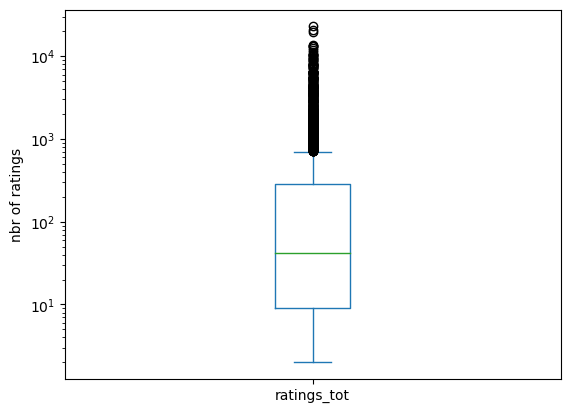

In [20]:
df_matched_beer_users["ratings_tot"].plot(kind="box")
plt.yscale("log")
plt.ylabel("nbr of ratings")

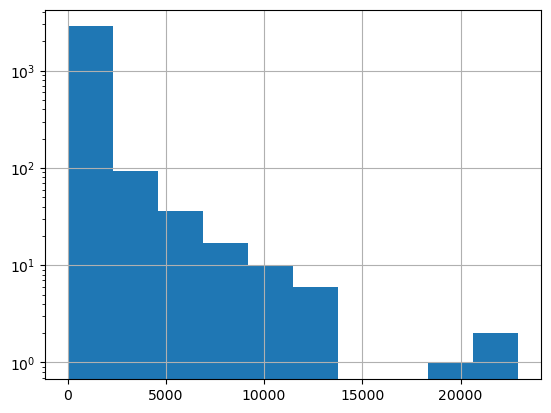

In [21]:
df_matched_beer_users["ratings_tot"].hist()
#plt.xscale("log")
plt.yscale("log")

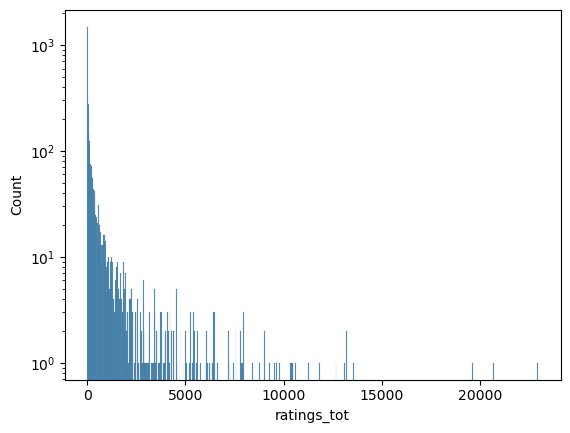

In [22]:
sns.histplot(df_matched_beer_users["ratings_tot"],kde=False)
plt.yscale("log")

In [23]:
min_rating_expert=np.percentile(df_matched_beer_users["ratings_tot"],95)

In [26]:
df_matched_beer_users["expert"]=df_matched_beer_users["ratings_tot"]>min_rating_expert

In [39]:
df_matched_beer_users["expert"].value_counts()

expert
False    2869
True      151
Name: count, dtype: int64

In [37]:
df_matched_beer_users.groupby("location_ba")["expert"].agg(lambda x: np.sum(x)/len(x)).loc[df_matched_beer_users.groupby("location_ba")["expert"].agg("sum")>2]

location_ba
Canada     0.070175
England    0.121212
Germany    0.176471
Spain      0.150000
Sweden     0.102564
USA        0.045045
Name: expert, dtype: float64

In [24]:
df_matched_beer_users["location_ba"]=df_matched_beer_users["location_ba"].apply(lambda x: "USA" if "United States" in x else x)

In [25]:
experts=df_matched_beer_users.loc[df_matched_beer_users["ratings_tot"]>min_rating_expert].copy(deep=True)

#### Location of the experts

In [86]:
experts.groupby("location_ba").agg("size").sort_values(ascending=False)/experts.shape[0]*100

locationba
USA            72.847682
Canada          7.947020
England         2.649007
Sweden          2.649007
Germany         1.986755
Spain           1.986755
Belgium         1.324503
Finland         1.324503
Netherlands     1.324503
Norway          1.324503
Romania         1.324503
Belarus         0.662252
Estonia         0.662252
Mexico          0.662252
Slovenia        0.662252
Switzerland     0.662252
dtype: float64

In [87]:
df_matched_beer_users.groupby("locationba").agg("size").sort_values(ascending=False)/df_matched_beer_users.shape[0]*100

locationba
USA          80.860927
Canada        5.662252
Australia     1.357616
Sweden        1.291391
England       1.092715
               ...    
Chile         0.033113
Bulgaria      0.033113
Belize        0.033113
Belarus       0.033113
Vietnam       0.033113
Length: 61, dtype: float64

We can make an interactice map on that

Do they come (rate) from Beer Advocate or Beer Review ?

In [97]:
df_matched_beer_users["proportion_ba_ratings"]=df_matched_beer_users["nbr_ratingsba"]/df_matched_beer_users["ratings_tot"]

In [89]:
experts["proportion_ba_ratings"]=experts["nbr_ratingsba"]/experts["ratings_tot"]

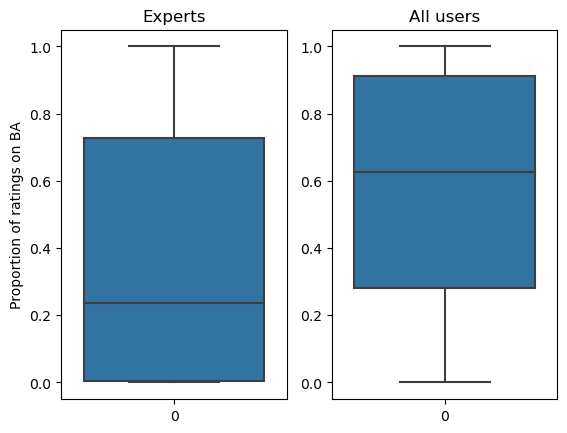

In [104]:
fig,ax=plt.subplots(1,2)
sns.boxplot(experts["proportion_ba_ratings"].values,ax=ax[0])
sns.boxplot(df_matched_beer_users["proportion_ba_ratings"].values,ax=ax[1])
ax[0].set_ylabel("Proportion of ratings on BA")
ax[0].set_title("Experts")
ax[1].set_title("All users")
plt.show()

We can do an analysis on the ratings of the experts. We want to know what type of beers they rate (well-knowed ?). Are they more severe (we would need to do matching on a propensity score to match ratangs from the same beers, or similar beers).

In [88]:
df_matched_beer_beers

,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,bros_score,nbr_matched_valid_ratings,nbr_ratings,nbr_reviews,style,zscore,abv.1,avg.1,avg_computed.1,avg_matched_valid_ratings.1,beer_id.1,beer_name.1,beer_wout_brewery_name.1,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff,sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,80.0,59,75,59,English Pale Ale,-0.649167,4.8,2.79,2.923596,2.923596,37923,Strangford Lough Legbiter,Legbiter,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,NaN,6,8,6,English Pale Ale,0.093110,6.0,3.10,3.290909,3.290909,41286,Strangford Lough St. Patricks Ale,Patricks Ale St,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,90.0,48,64,48,English Bitter,-0.478579,4.2,2.82,2.831081,2.831081,41287,Strangford Lough St. Patricks Best,Patricks Best St,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,NaN,1,1,1,American Pale Wheat Ale,0.262870,4.8,2.76,2.775000,2.775000,41285,Strangford Lough St. Patricks Gold,Patricks Gold St,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,NaN,0,0,0,Irish Dry Stout,NaN,4.5,2.86,3.200000,3.200000,230283,Sheelin Stout,Stout,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45635,6.4,3.24,3.240000,3.236667,NaN,96911,Pale Ale,Pale Ale,32205,Do Can Brewery,NaN,3,4,3,English Pale Ale,-1.099528,6.4,2.86,3.500000,3.500000,242782,Do Can Pale Ale,Pale Ale,18345,Do Can Brewery,1,1,NaN,India Pale Ale (IPA),NaN,0.161214,1.000000,1.0
45636,5.1,3.30,3.260000,3.248571,81.0,37457,Mustang Gold Ale,Ale Gold Mustang,10673,Warbird Brewing Company,NaN,21,22,21,American Blonde Ale,-0.940805,5.1,2.56,2.535088,2.535088,68764,Warbird Mustang Gold Ale,Ale Gold Mustang,5358,Warbird Brewing Company,57,57,21.0,Golden Ale/Blond Ale,18.0,-1.227920,0.806680,1.0
45637,6.0,3.54,3.545000,3.550000,83.0,47287,Shanty Irish,Irish Shanty,10673,Warbird Brewing Company,NaN,9,10,9,Irish Red Ale,-0.488225,6.0,3.03,3.096000,3.096000,76984,Warbird Shanty Irish,Irish Shanty,5358,Warbird Brewing Company,50,50,48.0,Irish Ale,57.0,-0.357975,1.000000,1.0
45638,6.0,3.56,3.664762,3.698000,83.0,37177,Thunderbolt Wheat,Wheat Thunderbolt,10673,Warbird Brewing Company,NaN,20,21,20,Hefeweizen,-0.229246,6.0,2.98,3.003390,3.003390,78298,Warbird Thunderbolt Wheat,Wheat Thunderbolt,5358,Warbird Brewing Company,59,59,44.0,German Hefeweizen,50.0,-0.491306,1.000000,1.0


## After 2nd meeting

### Evolution of number of ratings per users over the years (Rate Beers)

In [8]:
df_advocate_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.0,3.5,3.5,4.0,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.0,3.5,4.0,4.0,4.5,3.98,NaN,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.0,4.0,4.0,4.0,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True


In [9]:
df_advocate_ratings.shape

(8393033, 17)

In [65]:
sample_df_advocate_ratings=df_advocate_ratings.sample(100000,random_state=42)

In [66]:
#df_advocate_ratings["date"]=pd.to_datetime(df_advocate_ratings["date"],unit="s")

C:\Users\Alexi\AppData\Local\Temp\ipykernel_7784\553867878.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_advocate_ratings["date"]=pd.to_datetime(df_advocate_ratings["date"],unit="s")


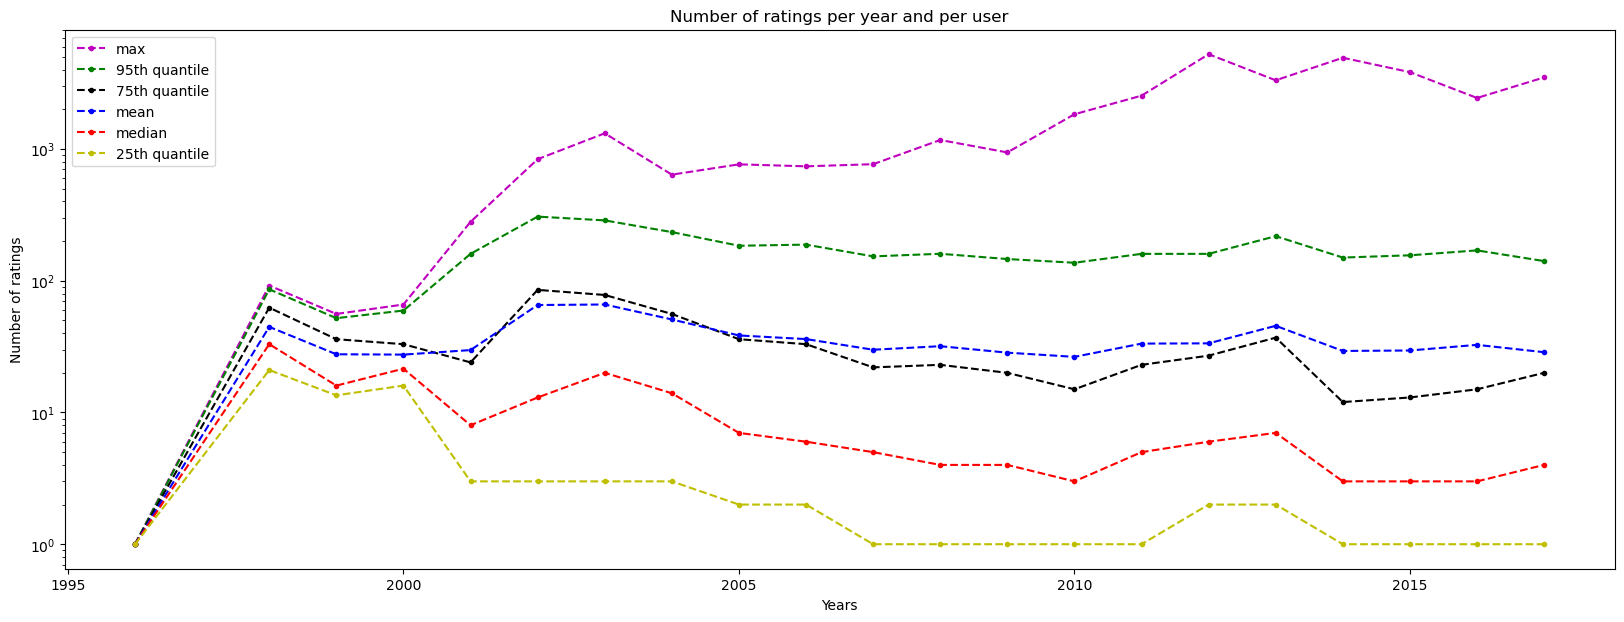

In [10]:

mean_nbr_ratings_over_years=[]
median_nbr_ratings_over_years=[]
max_nbr_ratings_over_years=[]
quantile_5_nbr_ratings_over_years=[]
quantile_25_nbr_ratings_over_years=[]
quantile_75_nbr_ratings_over_years=[]

df_advocate_ratings["date"]=pd.to_datetime(df_advocate_ratings["date"],unit="s")
df_advocate_ratings["year"]=df_advocate_ratings["date"].dt.year
nbr_ratings_per_year_and_user=df_advocate_ratings.groupby(["user_id","year"]).agg("size").reset_index()
years=np.sort(nbr_ratings_per_year_and_user.year.unique())
nbr_ratings_per_year_and_user=df_advocate_ratings.groupby(["user_id","year"]).agg("size")

for a_year in years:
    mean_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].mean())
    median_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].median())
    quantile_5_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.95))
    quantile_25_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.25))
    quantile_75_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].quantile(0.75))
    max_nbr_ratings_over_years.append(nbr_ratings_per_year_and_user[:,a_year].max())
        
# Plot the results
plt.figure(figsize=(20,7))
markersize=3
plt.plot(years, max_nbr_ratings_over_years, label="max", c="m", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_5_nbr_ratings_over_years, label="95th quantile", c="g", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_75_nbr_ratings_over_years, label="75th quantile", c="k", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, mean_nbr_ratings_over_years, label="mean", c="b", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, median_nbr_ratings_over_years, label="median", c="r", linestyle="--", marker='o', markersize=markersize)
plt.plot(years, quantile_25_nbr_ratings_over_years, label="25th quantile", c="y", linestyle="--", marker='o', markersize=markersize)
plt.legend()
plt.yscale("log")
plt.ylabel("Number of ratings")
plt.xlabel("Years")
plt.title("Number of ratings per year and per user")
plt.show()
    

We should start our analysis from year 2001 or 2002

In [11]:
len(years)

21

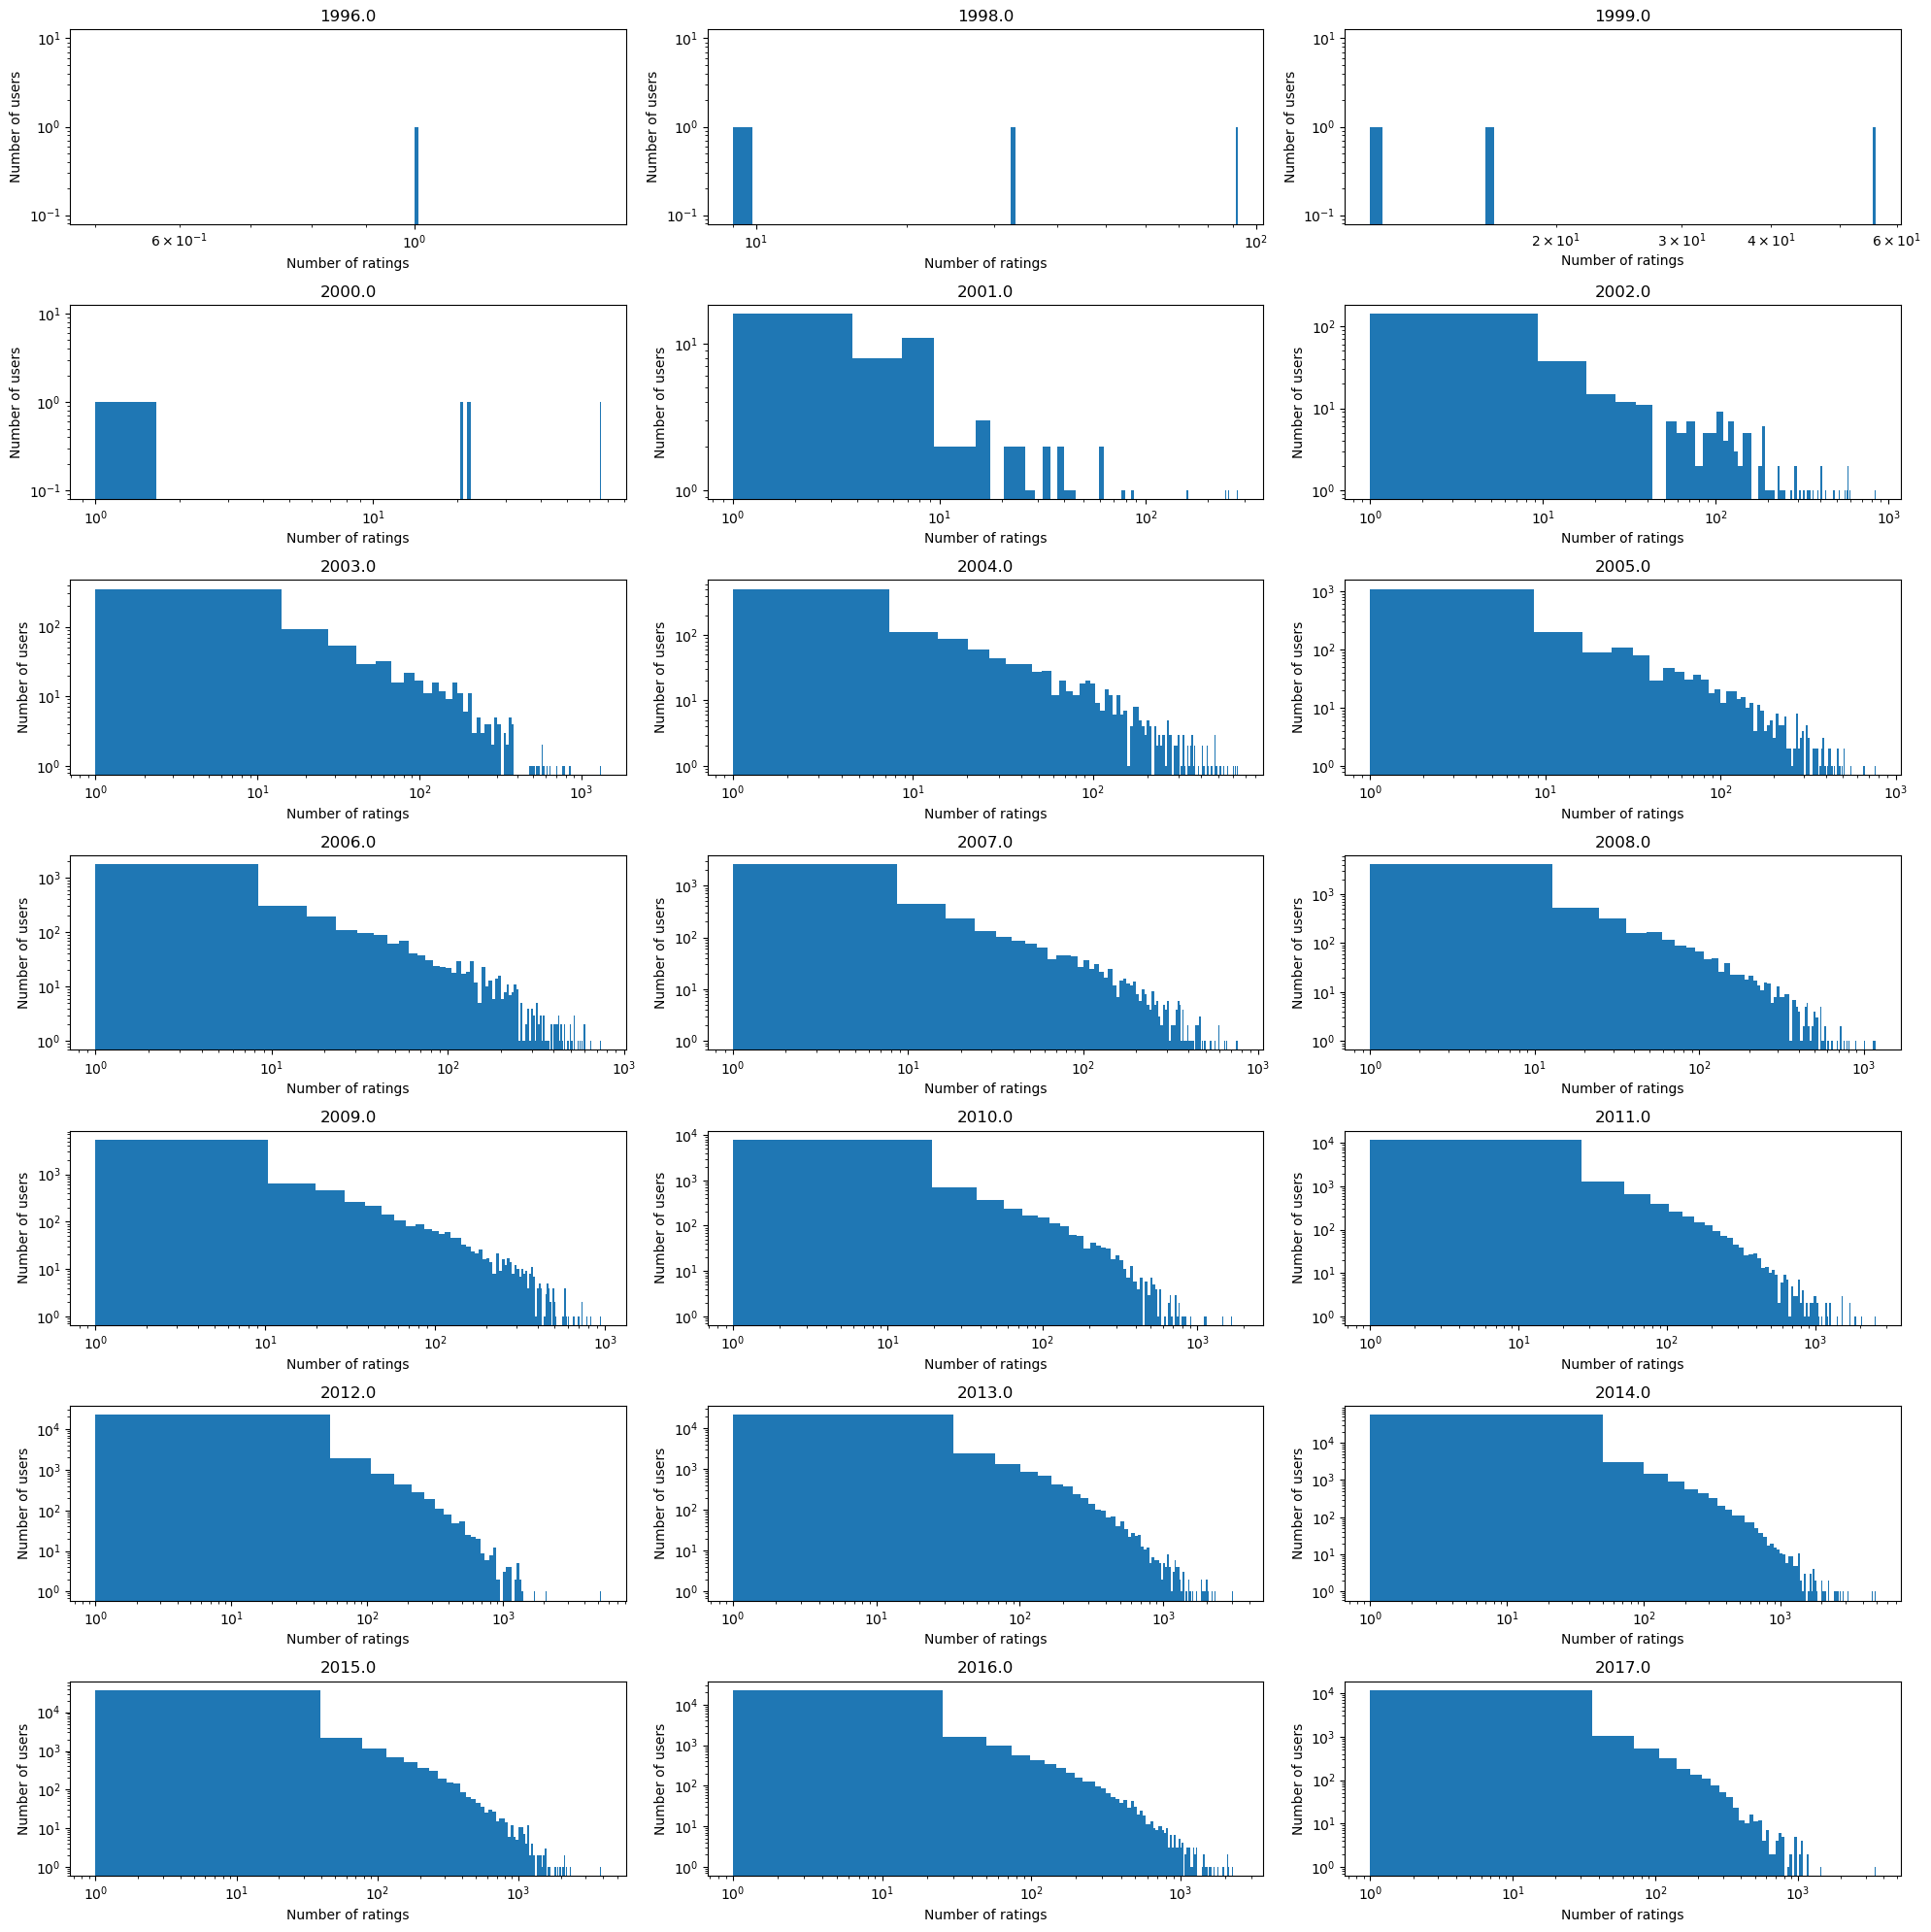

In [12]:
# Now we plot the distribution of the number of ratings per user every year
fig,ax=plt.subplots(len(years)//3,3)
fig.set_size_inches(20,20)
for i,a_year in enumerate(years):
    ax[i//3,i%3].hist(nbr_ratings_per_year_and_user[:,a_year],bins=100,log=True)
    ax[i//3,i%3].set_title(str(a_year))
    ax[i//3,i%3].set_xscale("log")
    ax[i//3,i%3].set_xlabel("Number of ratings")
    ax[i//3,i%3].set_ylabel("Number of users")
fig.tight_layout()
plt.show()

#### Let's analyse year 2016

In [13]:
YEAR=2016
threshold_expert_2016=nbr_ratings_per_year_and_user[:,YEAR].quantile(0.95)
experts_2016=nbr_ratings_per_year_and_user[:,YEAR].loc[nbr_ratings_per_year_and_user[:,YEAR]>threshold_expert_2016].index.values
non_experts_2016=nbr_ratings_per_year_and_user[:,YEAR].loc[nbr_ratings_per_year_and_user[:,YEAR]<=threshold_expert_2016].index.values

In [14]:
df_advocate_ratings_2016=df_advocate_ratings.loc[df_advocate_ratings["year"]==YEAR]
#env 1 min

In [15]:
ratings_experts_index=df_advocate_ratings_2016["user_id"].isin(experts_2016)

In [16]:
df_advocate_ratings_2016_experts=df_advocate_ratings_2016.loc[ratings_experts_index]
df_advocate_ratings_2016_non_experts=df_advocate_ratings_2016.loc[~ratings_experts_index]
# env 50s

#### Now we need to add the cumulative number of ratings over the years for every beer

In [18]:
df_advocate_ratings.shape

(8393033, 18)

In [46]:
df_grouped_beer_year=df_advocate_ratings.groupby(["beer_id","year"]).agg("size")

In [37]:
df_grouped_beer_year["10"][2002]

21

In [47]:
df_grouped_beer_year

beer_id  year  
10       2001.0      1
         2002.0     21
         2003.0     70
         2004.0     43
         2005.0     67
                  ... 
99997    2016.0    101
         2017.0     38
99998    2013.0      9
99999    2013.0     10
         2014.0      1
Length: 608481, dtype: int64

In [51]:
2000 in df_grouped_beer_year["99997"]

False

In [41]:
df_advocate_ratings.head(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,year
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 09:59:28,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,2015.0
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 10:59:12,StJamesGate,stjamesgate.163714,3.0,3.5,3.5,4.0,3.5,3.67,Pours pale copper with a thin head that quickl...,True,2009.0


In [54]:
df_advocate_ratings["nbr_ratings_beer_year-1"]=df_advocate_ratings.apply(lambda x: df_grouped_beer_year[str(x["beer_id"])][x["year"]-1] 
                                                if (x["year"]-1 in df_grouped_beer_year[str(x["beer_id"])])  else 0,axis=1)

MemoryError: Unable to allocate 1.13 GiB for an array with shape (18, 8393033) and data type object